In [8]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np

import re

# !pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to /home/mateo1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mateo1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data

In [ ]:
data = pd.read_csv("data/ACL_data.csv")
data.head()

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
0,2022,A Systematic Survey of Text Worlds as Embodied...,Text Worlds are virtual environments for embod...,"Jansen, Peter",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
1,2022,A Minimal Computational Improviser Based on Or...,A prototype system for playing a minimal impro...,"Montfort, Nick and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
2,2022,Craft an Iron Sword: Dynamically Generating In...,Non-Player Characters (NPCs) significantly enh...,"Volum, Ryan and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
3,2022,A Sequence Modelling Approach to Question Answ...,Interactive Question Answering (IQA) requires ...,"Furman, Gregory and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
4,2022,Automatic Exploration of Textual Environments ...,The purpose of this extended abstract is to di...,"Teodorescu, Laetitia and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33811 entries, 0 to 33810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YEAR       33811 non-null  int64 
 1   TITLE      33811 non-null  object
 2   ABSTRACT   33703 non-null  object
 3   AUTHOR     33768 non-null  object
 4   PUBLISHER  32951 non-null  object
 5   BOOKTITLE  33156 non-null  object
 6   CATEGORY   33811 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [113]:
data.BOOKTITLE.value_counts()

Proceedings of the 12th Language Resources and Evaluation Conference                                                      895
Proceedings of the 2021 Conference on Empirical Methods in Natural Language Processing                                    847
Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics                                   778
Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing (EMNLP)                            751
Proceedings of the Tenth International Conference on Language Resources and Evaluation ({LREC}'16)                        745
                                                                                                                         ... 
Feasibility Study on Fully Automatic High Quality Translation                                                               1
Actes de la 9{\`e}me conf{\'e}rence sur le Traitement Automatique des Langues Naturelles. Conf{\'e}rences invit{\'e}es

In [12]:
data.PUBLISHER.value_counts()

Association for Computational Linguistics                                                 21004
European Language Resources Association (ELRA)                                             4147
ATALA                                                                                      1375
European Language Resources Association                                                    1104
The COLING 2016 Organizing Committee                                                        739
International Committee on Computational Linguistics                                        654
INCOMA Ltd.                                                                                 573
Association for Machine Translation in the Americas                                         384
International Committee for Computational Linguistics                                       307
Asian Federation of Natural Language Processing                                             253
Chinese Information Processing Society o

In [13]:
data.CATEGORY.value_counts()

INPROCEEDINGS    32352
Name: CATEGORY, dtype: int64

In [56]:
data.ABSTRACT[:3].values

array(['Text Worlds are virtual environments for embodied agents that, unlike 2D or 3D environments, are rendered exclusively using textual descriptions. These environments offer an alternative to higher-fidelity 3D environments due to their low barrier to entry, providing the ability to study semantics, compositional inference, and other high-level tasks with rich action spaces while controlling for perceptual input. This systematic survey outlines recent developments in tooling, environments, and agent modeling for Text Worlds, while examining recent trends in knowledge graphs, common sense reasoning, transfer learning of Text World performance to higher-fidelity environments, as well as near-term development targets that, once achieved, make Text Worlds an attractive general research paradigm for natural language processing.',
       "A prototype system for playing a minimal improvisational game with one or more human or computer players is discussed. The game, Chain Reaction, has p

In [4]:
#\W: Matchea caracteres que NO sean alfanuméricos; equivalente a[^a-zA-Z0-9_].
#Los caracteres especiales + y * machean el patron mas largo posible ( se dice que + y * son "greedy")

re.sub('[^A-Za-z0-9]+', ' ', data.ABSTRACT[0])

'Text Worlds are virtual environments for embodied agents that unlike 2D or 3D environments are rendered exclusively using textual descriptions These environments offer an alternative to higher fidelity 3D environments due to their low barrier to entry providing the ability to study semantics compositional inference and other high level tasks with rich action spaces while controlling for perceptual input This systematic survey outlines recent developments in tooling environments and agent modeling for Text Worlds while examining recent trends in knowledge graphs common sense reasoning transfer learning of Text World performance to higher fidelity environments as well as near term development targets that once achieved make Text Worlds an attractive general research paradigm for natural language processing '

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1963'),
  Text(1, 0, '1971'),
  Text(2, 0, '1974'),
  Text(3, 0, '1975'),
  Text(4, 0, '1976'),
  Text(5, 0, '1977'),
  Text(6, 0, '1978'),
  Text(7, 0, '1984'),
  Text(8, 0, '1989'),
  Text(9, 0, '1991'),
  Text(10, 0, '1993'),
  Text(11, 0, '1994'),
  Text(12, 0, '1995'),
  Text(13, 0, '1997'),
  Text(14, 0, '1998'),
  Text(15, 0, '1999'),
  Text(16, 0, '2000'),
  Text(17, 0, '2001'),
  Text(18, 0, '2002'),
  Text(19, 0, '2003'),
  Text(20, 0, '2004'),
  Text(21, 0, '2005'),
  Text(22, 0, '2006'),
  Text(23, 0, '2007'),
  Text(24, 0, '2008'),
  Text(25, 0, '2009'),
  Text(26, 0, '2010'),
  Text(27, 0, '2011'),
  Text(28, 0, '2012'),
  Text(29, 0, '2013'),
  Text(30, 0, '2014'),
  Text(31, 0, '2015'),
  Text(32, 0, '2016'),
  Text(33, 0, '2017'),
  Text(34, 0, '2018'),
  Text(35, 0, '2019'),


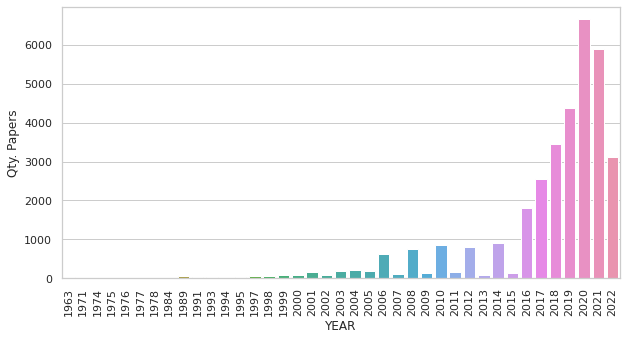

In [12]:
df_anno = data.groupby(pd.Grouper(key='YEAR')).agg({'TITLE':'count'}).reset_index()
df_anno['%_total']= df_anno['TITLE']/df_anno['TITLE'].sum()

plt.rcParams["figure.figsize"] = (10, 5)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="YEAR", y="TITLE", data=df_anno)
ax.set(xlabel='YEAR', ylabel='Qty. Papers')
plt.xticks(rotation=90)


## Cleaning and tokenize

In [153]:
# En este caso particular no hace falta limpiar los textos
def clean_text(text):
    if isinstance(text, pd.Series):
        # return text.str.replace('[^A-Za-z0-9]+', ' ', regex = True).str.lower().str.strip().values
        return text.str.replace('\W+', ' ', regex = True).str.lower().str.strip().str.replace('\d+', '').values
    elif isinstance(text, str):
        return re.sub('\d+', '',  re.sub('[^A-Za-z0-9]+', ' ' , text.lower()).strip())

def tokenizer(text):
    #return [w for w in word_tokenize(text) if w.isalpha()] # si solo nos interesan palabras
    return word_tokenize(str(text))
    # if isinstance(text, str):
    #     return word_tokenize(text)
    # else:
    #     return text.apply(word_tokenize)



In [154]:
clean_text(data.ABSTRACT[0])

'text worlds are virtual environments for embodied agents that unlike d or d environments are rendered exclusively using textual descriptions these environments offer an alternative to higher fidelity d environments due to their low barrier to entry providing the ability to study semantics compositional inference and other high level tasks with rich action spaces while controlling for perceptual input this systematic survey outlines recent developments in tooling environments and agent modeling for text worlds while examining recent trends in knowledge graphs common sense reasoning transfer learning of text world performance to higher fidelity environments as well as near term development targets that once achieved make text worlds an attractive general research paradigm for natural language processing'

In [122]:
# word_tokenize(clean_text(data.ABSTRACT))
tokenizer(clean_text(data.ABSTRACT))[0:10]

['[',
 "'text",
 'worlds',
 'are',
 'virtual',
 'environments',
 'for',
 'embodied',
 'agents',
 'that']

In [117]:
len(tokenizer(clean_text(data.ABSTRACT)))

1299

In [19]:
print( type( clean_text( data.ABSTRACT[0]) ))
print( type(clean_text( data.ABSTRACT[:1]) ) )
print( type(clean_text( data.ABSTRACT) ) )

# tokenizer(clean_text(data.ABSTRACT[:1] ))#[:10]

<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Normalizacion

In [104]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")


[(w,stemmer.stem(w)) for w in tokenizer(clean_text(data.ABSTRACT)) if w.isalpha()][:10]

[('worlds', 'world'),
 ('are', 'are'),
 ('virtual', 'virtual'),
 ('environments', 'environ'),
 ('for', 'for'),
 ('embodied', 'embodi'),
 ('agents', 'agent'),
 ('that', 'that'),
 ('unlike', 'unlik'),
 ('or', 'or')]

In [108]:
stemmer.stem(clean_text(data.ABSTRACT[0]))

'text worlds are virtual environments for embodied agents that, unlike 2d or 3d environments, are rendered exclusively using textual descriptions. these environments offer an alternative to higher-fidelity 3d environments due to their low barrier to entry, providing the ability to study semantics, compositional inference, and other high-level tasks with rich action spaces while controlling for perceptual input. this systematic survey outlines recent developments in tooling, environments, and agent modeling for text worlds, while examining recent trends in knowledge graphs, common sense reasoning, transfer learning of text world performance to higher-fidelity environments, as well as near-term development targets that, once achieved, make text worlds an attractive general research paradigm for natural language processing.'

In [109]:
clean_text(data.ABSTRACT[0])

'text worlds are virtual environments for embodied agents that, unlike 2d or 3d environments, are rendered exclusively using textual descriptions. these environments offer an alternative to higher-fidelity 3d environments due to their low barrier to entry, providing the ability to study semantics, compositional inference, and other high-level tasks with rich action spaces while controlling for perceptual input. this systematic survey outlines recent developments in tooling, environments, and agent modeling for text worlds, while examining recent trends in knowledge graphs, common sense reasoning, transfer learning of text world performance to higher-fidelity environments, as well as near-term development targets that, once achieved, make text worlds an attractive general research paradigm for natural language processing.'

## Stoplist

In [142]:
stoplist = stopwords.words("english")
stoplist[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [143]:
# tokenizo el stoplist con el mismo tokenizar que voy a usar en el corpus
stoplist_tokenized = []
for w in stoplist:
    stoplist_tokenized = stoplist_tokenized + tokenizer(w)
    
# Armo una lista sin repeticiones
stoplist_tokenized = list(set(stoplist_tokenized))

stoplist_tokenized[:10]

['doing',
 'but',
 'so',
 'until',
 'yours',
 'from',
 'again',
 'mustn',
 'will',
 'against']

In [69]:
[(w,stemmer.stem(w)) for w in clean_text(data.ABSTRACT.iloc[0]) if w.isalpha()][:10]

[('T', 't'),
 ('e', 'e'),
 ('x', 'x'),
 ('t', 't'),
 ('W', 'w'),
 ('o', 'o'),
 ('r', 'r'),
 ('l', 'l'),
 ('d', 'd'),
 ('s', 's')]

## Extraigo features

In [155]:
count_vect = CountVectorizer(preprocessor=clean_text,
                             tokenizer=tokenizer,
                             min_df=5,
                             stop_words=stoplist_tokenized)

data_clean = count_vect.fit_transform(data.ABSTRACT.values.astype('U')) # cuenta frecuencia de tokens y define el diccionario
# X_test = count_vect.transform(X_test_text) # cuenta frecuencia de tokens existentes en el diccionario
data_clean

<33811x15168 sparse matrix of type '<class 'numpy.int64'>'
	with 2200801 stored elements in Compressed Sparse Row format>

+ Consultar sobre diferencia entre fit_transform y transform

+ Falta limpiar  terminos ?

In [118]:
print("tamaño de la matriz:",32352*19342)
print("porcentaje de elementos distintos de cero: %",round(100*2334801/(32352*19342),2))

tamaño de la matriz: 625752384
porcentaje de elementos distintos de cero: % 0.37


In [156]:
count_vect.get_feature_names()[:20]

['aa',
 'aac',
 'aachen',
 'aae',
 'ab',
 'abandoned',
 'abbreviated',
 'abbreviation',
 'abbreviations',
 'abc',
 'abduction',
 'abductive',
 'abdul',
 'abeill',
 'abilities',
 'ability',
 'ablating',
 'ablation',
 'ablations',
 'ablative']